In [81]:
import matplotlib.pyplot as plt
import cv2
import string
from PIL import Image
from spellchecker import SpellChecker
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [82]:
img = cv2.imread('qwerty.jpg', -1)

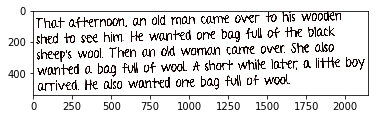

In [83]:
plt.imshow(img)

In [84]:
img = cv2.GaussianBlur(img,(5,5),0)

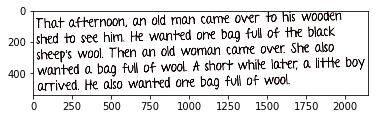

In [85]:
plt.imshow(img)

In [86]:
size_tup = img.shape


In [87]:
b,g,r = cv2.split(img)

In [88]:
img2 = cv2.merge([r,g,b])

In [89]:
my_mask= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [90]:
print(img.shape)

(538, 2146, 3)


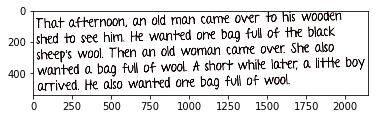

In [91]:
plt.imshow(img)

In [92]:
print(pytesseract.image_to_string(img))

That afternoon, an old man came over to his wooaen
shed to see him. He wanted one bag full of the black
sheep's wool. Then an old woman came Over. She also
wanted a bag full of wool. A short white later, a litte boy
arrived. He also wanted one bag full of wool.


In [93]:
strout = pytesseract.image_to_string(img)

In [94]:
print(strout)

That afternoon, an old man came over to his wooaen
shed to see him. He wanted one bag full of the black
sheep's wool. Then an old woman came Over. She also
wanted a bag full of wool. A short white later, a litte boy
arrived. He also wanted one bag full of wool.


In [96]:
#Proper nouns have to be written in Capitals.

spell = SpellChecker()
i = 0
pnounmark = [0] * (len(strout.split()))
#mark all the proper nouns with 1
for word in strout:
    if(word[0] <= 'Z' and word[0] >= 'A'):
        pnounmark[i] = 1
        i = i + 1
list1 = strout.split()
i = 0
#If the word is not a proper noun and the spelling is not correct then replace
for word in list1:
    if((pnounmark[i] != 1) and (spell[word] == 0)):
        list1[i] = spell.correction(word)
    i = i + 1
strcorr = ' '.join(map(str, list1))
print(strcorr)

That afternoon, an old man came over to his wooden shed to see him. He wanted one bag full of the black sheeps wool Then an old woman came over She also wanted a bag full of wool A short white later a little boy arrived He also wanted one bag full of wool


In [97]:
file = open('textoutput.txt','w') 
file.write(strcorr)  
file.close()